In [1]:
!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

torch:  1.11 ; cuda:  1.11.0


In [74]:
!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import imutils
# import some common libraries
import numpy as np
import os, json, cv2, random
import cv2 as cv
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [3]:
def pltshow(imgzz):
    plt.imshow(cv2.cvtColor(imgzz, cv2.COLOR_BGR2RGB))
    
plt.rcParams["figure.figsize"] = (20,20)

In [50]:
def histeq(rgb_img):
    ycrcb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2YCrCb)
    ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])
    return cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)

def subtractMaskFromImg(img, mask1):
    mask2 = cv2.bitwise_not(mask1)
    return cv2.bitwise_and(img, img, mask = mask2)

def getMaskFromImg(img, mask):
    return cv2.bitwise_and(img, img, mask = mask)

In [7]:
imgspathsss = ["check1.jpg", "check2.jpg", "check3.jpg", "check4.jpg", "check5.jpg", "check6.jpg", "check7.jpg"]
# imgpath = "../samples/check5.jpg"
imgpaths = ["../samples/" + x for x in imgspathsss]
# orig = cv2.imread(imgpath)
# image = orig.copy()
imgs = [cv2.imread(x) for x in imgpaths]
# imgs = [imutils.resize(cv2.imread(x), width = 500) for x in imgpaths]
imgs = [histeq(img) for img in imgs]
# image = imutils.resize(image, width = 500)
# im = image

In [8]:
os.environ["CUDA_VISIBLE_DEVICES"]=""
outs = []
for i in imgs:
    cfg = get_cfg()
    cfg.MODEL.DEVICE='cpu'
    # add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
    cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
    # Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
    predictor = DefaultPredictor(cfg)

    outputs = predictor(i)
    outs.append((cfg, outputs))

/Users/me/anaconda3/envs/collegeF21/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1646756029501/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


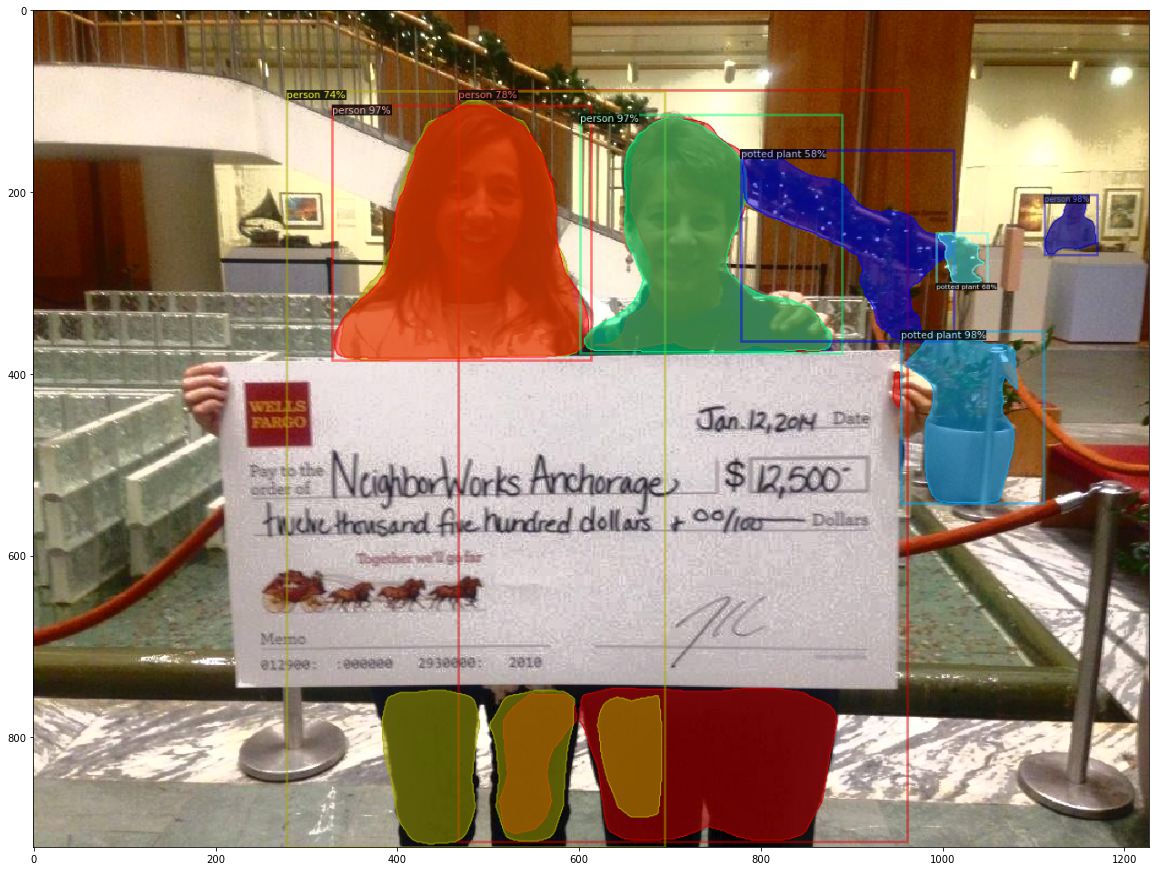

In [246]:
curr = 5
v = Visualizer(imgs[curr][:, :, ::-1], MetadataCatalog.get(outs[curr][0].DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outs[curr][1]["instances"].to("cpu"))
pltshow(out.get_image()[:, :, ::-1])

True

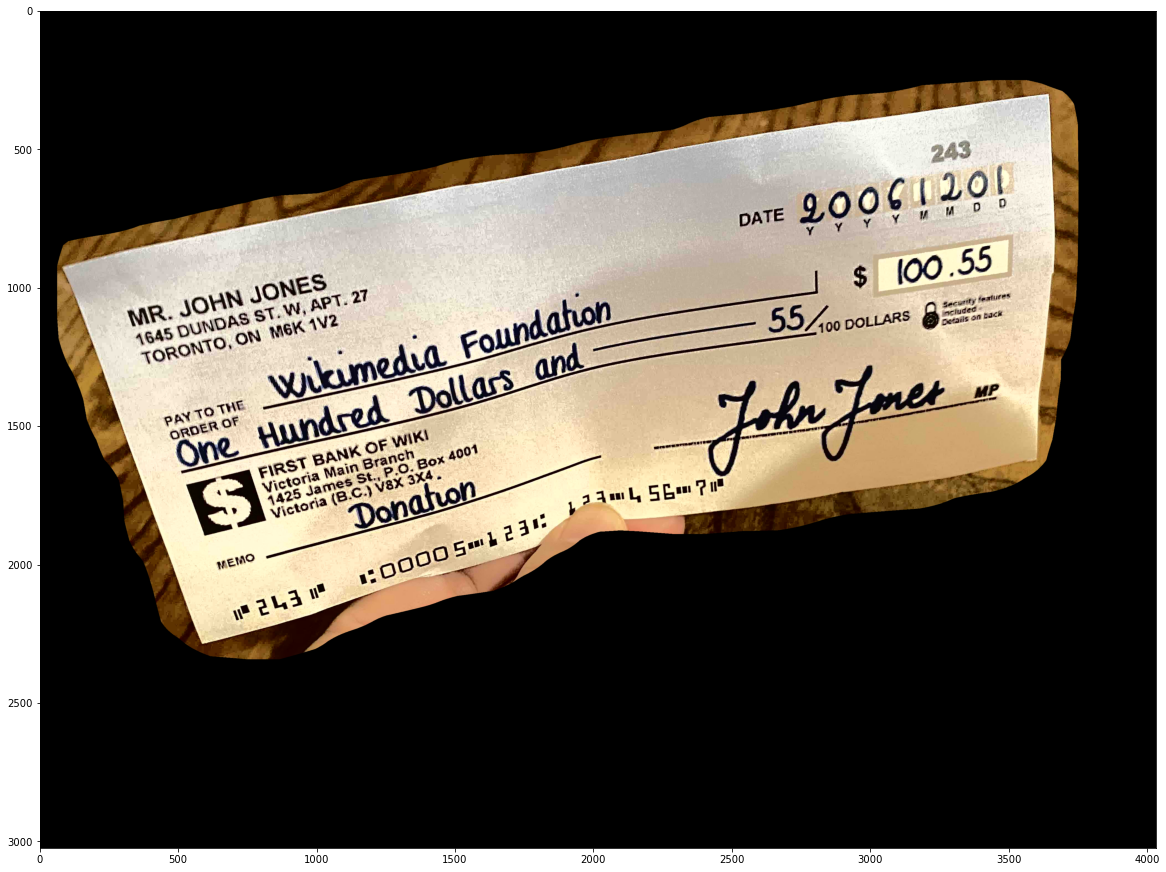

In [212]:
bookmask = np.array(temp.pred_masks[list(temp.pred_classes).index(73)])
indices = bookmask.astype(np.uint8)  #convert to an unsigned byte
indices*=255
kernel = np.ones((7,7), np.uint8)
img_dilation = cv2.dilate(indices, kernel, iterations=20)
bookMask = getMaskFromImg(imgs[curr], img_dilation)
pltshow(getMaskFromImg(imgs[curr], img_dilation))
newImg = bookMask.copy()
cv2.imwrite("book.jpg", bookMask)
cv2.imwrite("bookmask.jpg", img_dilation)
# pltshow(img_dilation)

In [207]:
cnt

array([[[3435,  253]],

       [[3420,  254]],

       [[3406,  255]],

       ...,

       [[3576,  255]],

       [[3571,  254]],

       [[3566,  253]]], dtype=int32)

In [206]:
approx

array([[[3435,  253]],

       [[  91,  842]],

       [[ 743, 2342]],

       [[3589, 1670]],

       [[3566,  253]]], dtype=int32)

In [236]:
image = imgs[curr].copy()

ret,thresh = cv2.threshold(img_dilation,127,255,0)
cnt,hier = cv2.findContours(thresh, 0, 3)
cnt = cnt[0]
boo = False
epsilon = 0.08*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,False)
print(len(approx))
# pltshow(cv.drawContours(image,[approx],0,(0,0,255),20))

5


In [237]:
# contours, hierarchy = cv2.findContours(img_dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted([approx], key=cv2.contourArea, reverse=True)
print(len([contours]))

1


In [230]:
contours = sorted([approx], key=cv2.contourArea, reverse=True)
# find the perimeter of the first closed contour
perim = cv2.arcLength(contours[0], True)
# setting the precision
epsilon = 0.02*perim
# approximating the contour with a polygon
approxCorners = cv2.approxPolyDP(contours[0], epsilon, True)
# check how many vertices has the approximate polygon
approxCornersNumber = len(approxCorners)
print("Number of approximated corners: ", approxCornersNumber)

# can also be used to filter before moving on [if needed]
# i.e. if approxCornersNumber== 4:

# printing the position of the calculated corners
print("Coordinates of approximated corners:\n", approxCorners)

Number of approximated corners:  4
Coordinates of approximated corners:
 [[[3566  253]]

 [[  91  842]]

 [[ 743 2342]]

 [[3589 1670]]]


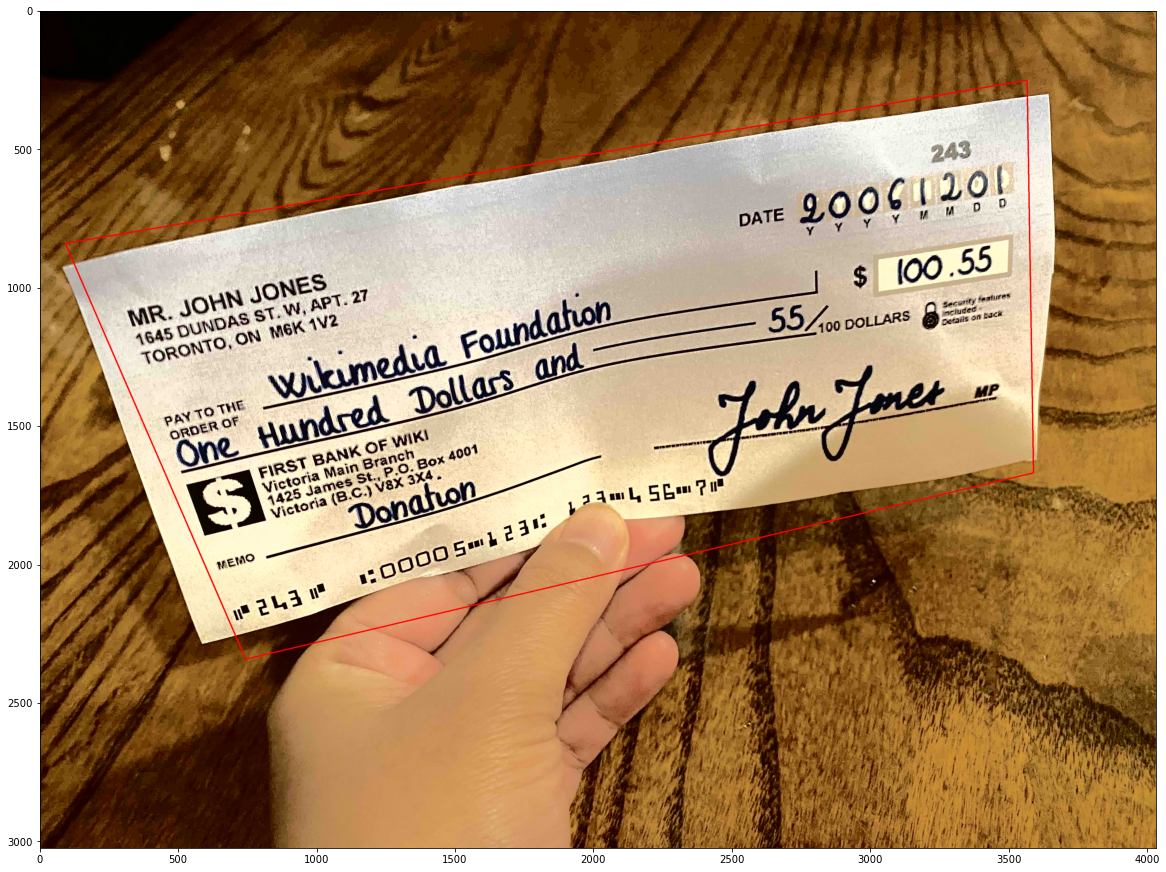

In [231]:
pltshow(cv2.drawContours(image, [approxCorners], -1, (0, 0, 255), 3))

In [200]:
def sortCorners(corners):
    c = []
    idx = 0
    for i in corners.tolist():
        c.append(i[0])
        idx+=1
    c = sorted(c, key=lambda x:x[1])
    topones = [c[0], c[1]]
    bottomones = [c[2], c[3]]
    topones = sorted(topones, key = lambda x:x[0])
    topleft = topones[0]
    topright = topones[1]

    botones = sorted(bottomones, key = lambda x:x[0])
    bottomleft = botones[0]
    bottomright = botones[1]
    cornersz = [topleft, topright, bottomleft, bottomright]
    return cornersz
sortCorners(approx)

[[3435, 253], [3566, 253], [91, 842], [3589, 1670]]

In [191]:
approx

array([[[3435,  253]],

       [[  91,  842]],

       [[ 743, 2342]],

       [[3589, 1670]],

       [[3566,  253]]], dtype=int32)

In [202]:
box = cv.boxPoints(sortCorners(approx))
box = np.int0(box)
pltshow(cv.drawContours(image,[box],0,(0,0,255),20))

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'boxPoints'
> Overload resolution failed:
>  - Can't parse 'box' as RotatedRect. Expected sequence length 3, got 4
>  - Can't parse 'box' as RotatedRect. Expected sequence length 3, got 4


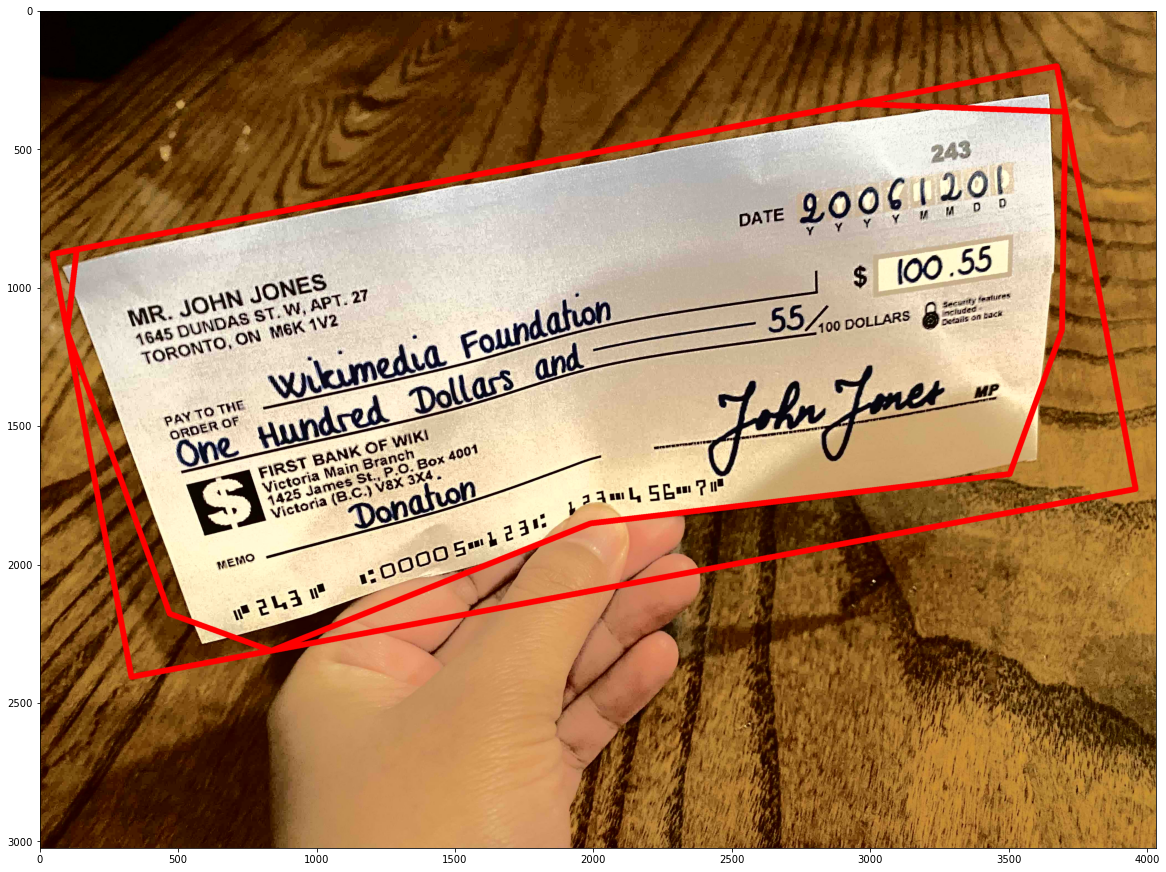

In [131]:
rect = cv.minAreaRect(approx)
box = cv.boxPoints(rect)
box = np.int0(box)
pltshow(cv.drawContours(image,[box],0,(0,0,255),20))

# book is pred_classes 73, people is 0

In [68]:
30 in temp.pred_classes

False

In [38]:
temp = outs[2][1]["instances"]
peopleMasks = []
bookMasks = []
if 73 in temp.pred_classes and 0 not in temp.pred_classes:
    print("Skip me, go straight to the next step")
elif 73 in temp.pred_classes and 0 in temp.pred_classes:  # assuming only one book in the image
    bookMask = temp.pred_masks[list(temp.pred_classes).index(73)]
    print(len(bookMask))
    

3024


In [56]:
bad = outputs["instances"][1]

In [59]:
bad.pred_masks

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]])

In [239]:
def sortApproxCorners(approx):
    # approx can be a list of any length
    c = []
    idx = 0
    for i in approx.tolist():
        c.append(i[0])
        idx+=1
    c = sorted(c, key=lambda x:x[0], reverse = True)
    rightMost = c[0]
    secondRightMost = c[1]
    leftMost = c[-1]
    secondLeftMost = c[-2]
    c = sorted(c, key=lambda x:x[1], reverse = True)
    topMost = c[0]
    secondTopMost = c[1]
    bottomMost = c[-1]
    secondBottomMost = c[-2]
    if rightMost == topMost:  # 1 or 2
        topright = topMost
        if bottomMost == leftMost:  # case 1 or 5
            if rightMost == secondBottomMost: # case 5
                bottomright = secondBottomMost
                topleft = secondTopMost
            else:  # case 1
                bottomleft = leftMost
                topleft = secondLeftMost
                bottomright = secondRightMost
        else:  # case 2 or case 6
            if leftMost == topMost  # case 2
                topleft = leftMost
                bottomleft = secondLeftMost
                bottomright = secondRightMost
    elif leftMost == topMost:  # case 3 or 4
        topleft = topMost
        if bottomMost == rightMost:  # case 3
            bottomright = rightMost
            bottomleft = secondBottomMost
            topright = secondTopMost
        else:  # case 4
            topright = secondTopMost
            bottomright = bottomMost
            bottomleft = secondBottomMost
    elif 
        
    return [topleft, topright, bottomleft, bottomright]
    

SyntaxError: invalid syntax (2857659908.py, line 29)